#**EECS 6412**
##Assignment 1, Q.4.
**Full Name:** Omid Farahmand, Ryan Chen

**Student Number:** 218140863, 217987918


---



You are provided with a helper function, load_support_from_csv, that loads the frequent itemsets from the WALMART DATASET into a Python dictionary. In this dictionary:


*   The key represents the number of items in each itemset.

*   The value is another dictionary, where:

      - The key is a tuple representing the itemset.

      - The value is the support count for that itemset.

Additionally, the dataset consists of 10,000 transactions.




In [33]:
import pandas as pd
def load_support_from_csv(filename):
    # Load the CSV into a pandas DataFrame
    df = pd.read_csv(filename)

    # Create a dictionary to store the support counts
    support_dict = {}

    # Iterate over the rows of the DataFrame
    for _, row in df.iterrows():
        item_size = int(row['Item Size'])
        itemset = tuple(map(int, row['Item Set'].split(', ')))  # Convert itemset to tuple of integers
        support = int(row['Support'])

        if item_size not in support_dict:
            support_dict[item_size] = {}

        support_dict[item_size][itemset] = support

    return support_dict

#Generate Rules:
You need to generate association rules in the **generate_rules** function. This function should take the following parameters:


*   support file: The path to the file containing frequent itemsets and their support values.
*   id2name file: The path to the file mapping item IDs to their names.
*  min confidence: The minimum confidence threshold for the generated rules.





The generate_rules function should return a Python dictionary *{(LHS, RHS): (confidence, lift)}*  where:

*   The keys are tuples containing the left-hand side (LHS) and right-hand side (RHS) itemsets (i.e., the antecedent and consequent of the rule (LHS, RHS)).

*   The values are tuples that contain the lift and confidence of the rule (confidence, lift).

To simplify and modularize your implementation, you might want to add additional helper functions.

In [34]:
#DO NOT DELETE
import pandas as pd
a= load_support_from_csv("itemset_support.csv")
print(a)
def generate_rules(support_file = "itemset_support.csv", id2name_file = "ID2Name.csv", min_confidence = 0.7):
    support_dict = load_support_from_csv(support_file)
    id2name = pd.read_csv(id2name_file)
    rules = {}
    #TODO
    #generate rules as a python dictionary
    #with itemsets (left hand side (lhs) and right hand side (rhs) itemsets) as dictionary keys
    #and lift and confidence as dictionary values
    #WRITE YOUR CODES HERE

    """
 This block generates association rules from a frequent itemset that has been used with the Apriori-Style approach to build rule outcomes.
 It is implemented using three methods, one for count support, which determines how frequently an itemset appears in the transaction.
 One for merging itemsets which will combine smaller components into larger ones for rule generation. One for generating rules which
 Extracts high-confidence association rules and calculates confidence & lift and makes sure only strong rules are kept.
    """

    # There are 10000 transcation
    total_transactions = 10000
    def support_count(items):

        # Get the support count for the itemset. how many times itemset appear in transaction
        item_sort = tuple(sorted(items))
        size = len(item_sort)
        #Return support count if found, else 0
        if size in support_dict:
            return support_dict[size].get(item_sort, 0)
        return 0

    # Helper function for merging two (prev_length-1)-item RHS sets
    def merge(c1, c2, prev_length):

    # if c1, c2 are length prev_length-1, check if they share first prev_length-2 items, if yes merge them
        if c1[:prev_length - 1] == c2[:prev_length - 1]:
            merged_set = sorted(set(c1).union(set(c2)))
            # If only have exactly length items
            if len(merged_set) == prev_length + 1:
                return tuple(merged_set)
        return None

  # Generate association rules from a given frequent itemset
    def rules_itemset(itemset):

    # Create all single item consequent and expand them if they pass min_conf
        itemset = tuple(sorted(itemset))
        n = len(itemset)
        # Return if there is fewer than 2 itemset
        if n < 2:
            return

      # The support count for entire itemset
        itemset_support_count = support_count(itemset)

        # Step 1: single item RHS, store the rhs
        current_consequents = []
        for item in itemset:
          # Single item RHS
            rhs = (item,)
            # LHS in the remaining item in the itemset
            lhs = tuple(sorted(set(itemset) - {item}))
            #get the support for the lhs
            lhs_support = support_count(lhs)
            #if its zero lhs support, skip it
            if lhs_support == 0:
                continue

            #confidence calculation
            confidence = itemset_support_count / lhs_support
            # consider the rules that meet minimum confidence
            if confidence >= min_confidence:
              #support count for the rhs
                rhs_support = support_count(rhs)
                #  if its zero support, skip it
                if rhs_support == 0:
                    continue

              # lift calculation, measure the association strength between lhs and rhs
                lift = (itemset_support_count * total_transactions) / (lhs_support * rhs_support)
                # store the lift and confidence
                rules[(lhs, rhs)] = (confidence, lift)
                # add rhs to the list
                current_consequents.append(rhs)

        # Step 2: Larger RHS
        rhs_length = 2
        while current_consequents:
          # if rhs is larger than the itemset size -1
            if rhs_length > n - 1:
                break

            # Store new valid consequent for next iteration
            next_consequents = []
            # combine pair of consequent
            for i in range(len(current_consequents)):
                for j in range(i + 1, len(current_consequents)):
                  # merging the two consequents that have first rhs_length-1 items
                    merged = merge(
                        current_consequents[i],
                        current_consequents[j],
                        rhs_length - 1
                    )
                    if merged is not None:
                      # new rhs
                        rhs = tuple(sorted(merged))
                        lhs = tuple(sorted(set(itemset) - set(rhs)))
                        # if lhs is empty, skip
                        if not lhs:
                            continue

                        # calcualte the support for lhs and chech if it meets rule
                        lhs_support = support_count(lhs)
                        if lhs_support == 0:
                            continue

                        # Calculate the confidence
                        confidence = itemset_support_count / lhs_support
                        # valid rule if confidence meet the minimum threshold
                        if confidence >= min_confidence:
                          # support count for rhs
                            rhs_supp = support_count(rhs)
                        # if it has zero support, skip it
                            if rhs_supp == 0:
                                continue

                             # lift calculation, measure the association strength between lhs and rhs
                            lift = (itemset_support_count * total_transactions) / (lhs_support * rhs_supp)
                            #store the valid rule
                            rules[(lhs, rhs)] = (confidence, lift)
                             # add rhs to the list
                            next_consequents.append(rhs)
            #updating for next iteration, using new consequent
            current_consequents = next_consequents
            # increment size of rhs
            rhs_length += 1

    # For every item that the size is >=2 in the dictionary, generate the rules.
    for value_size, itemsets_map in support_dict.items():
        if value_size < 2:
            continue
        for itemset_tuple, supp_count in itemsets_map.items():
            rules_itemset(itemset_tuple)

    return rules

{1: {(1882,): 202, (2490,): 81, (2872,): 226, (3869,): 167, (4115,): 216, (4869,): 1303, (4877,): 201, (2614,): 100, (1220,): 722, (1541,): 146, (1546,): 128, (1547,): 93, (2048,): 352, (2253,): 185, (2706,): 478, (2995,): 394, (3701,): 225, (3702,): 228, (1428,): 106, (2795,): 666, (3790,): 79, (5010,): 67, (1294,): 181, (1138,): 383, (1141,): 350, (1142,): 496, (1695,): 205, (1804,): 222, (2753,): 71, (3025,): 407, (3117,): 78, (3121,): 188, (3710,): 518, (3865,): 411, (3983,): 363, (4091,): 307, (4256,): 248, (4473,): 473, (4501,): 86, (4747,): 246, (4776,): 91, (3401,): 201, (2131,): 162, (3892,): 148, (4020,): 193, (4717,): 131, (4718,): 115, (4917,): 243, (4920,): 315, (4931,): 458, (4935,): 617, (4701,): 83, (2731,): 98, (3804,): 374, (1104,): 487, (1415,): 108, (1682,): 51, (2816,): 520, (2820,): 229, (2826,): 653, (2827,): 468, (2841,): 659, (3015,): 827, (3027,): 285, (3353,): 312, (3355,): 499, (3357,): 757, (3785,): 120, (4305,): 331, (4514,): 384, (4518,): 348, (2794,): 63

[link text](https://)# Write Rule into a text file
Write the generated association rules to a text file. The format of the association rules in the text file must strictly follow the structure provided in the reference image. Ensure that each rule clearly displays:


*   The left-hand side (LHS) and right-hand side (RHS) itemsets.
*   The confidence and lift values for each rule.


Additionally, make sure the output is well-structured, easy to read, and follows the format specifications exactly as shown in the picture.


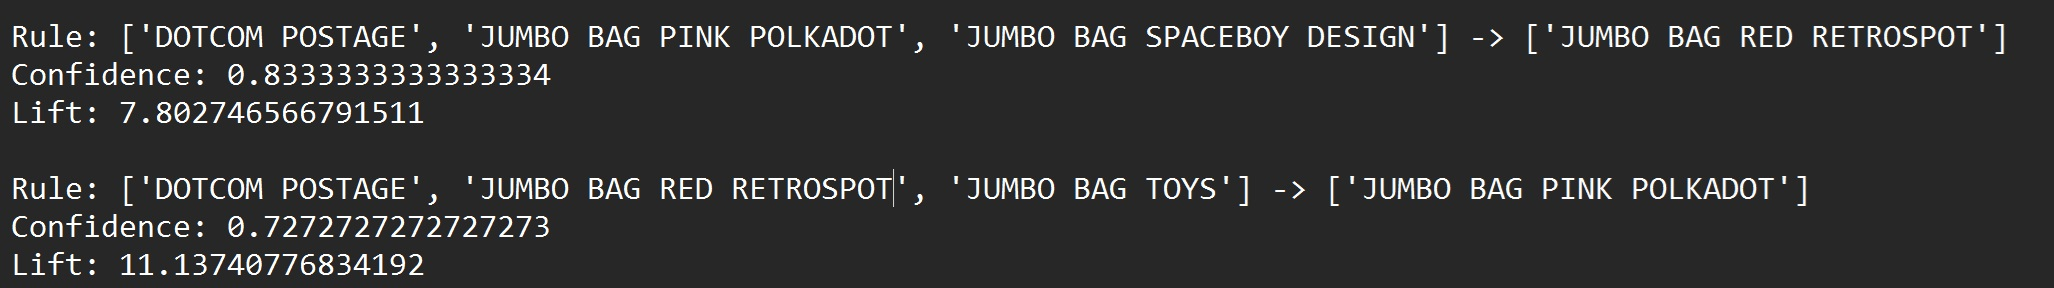





# New Section

In [36]:
#DO NOT DELETE
import time
str_time = time.time()
#GENERATE RULES
rules = generate_rules(support_file = "itemset_support.csv", id2name_file = "ID2Name.csv", min_confidence = 0.7)
end_time = time.time()
print(f"Time taken: {end_time - str_time} seconds")
#WRITE RULES INTO A TEXT FILE
file = open("rules.txt", "w")

"""
This block will replace the id with the names and writes the result (rules, confidence, and lift) into the text file (rules.txt).

"""

# the CSV file does not have a header so we specify the coloumn name
id2name = pd.read_csv("ID2Name.csv", header=None, names=["Item_ID", "Item_Name"]).set_index("Item_ID")["Item_Name"].to_dict()

for key, value in rules.items():
  #TODO
  #WRITE YOUR CODES HERE
  #get the rhs and lhs itemset from the key
    lhs_ids, rhs_ids = key
    # get confidence and lift values
    confidence, lift = value

    # Convert each ID in lhs_ids and rhs_ids to its name using id2name dictionary
    lhs_name = []
    for item_id in lhs_ids:
          lhs_name.append(id2name[item_id])

    rhs_name = []
    for item_id in rhs_ids:
          rhs_name.append(id2name[item_id])


    #UNCOMMENT THIS SECTION IF NECESSARY
    file.write(f"Rule: {lhs_name} -> {rhs_name}\n")
    file.write(f"Confidence: {confidence}\n")
    file.write(f"Lift: {lift}\n")
    file.write("\n")

Time taken: 0.9434690475463867 seconds
